In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
# Importing necesarry libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,  Dense, Dropout, Input

In [3]:
# To ensure GPU is present
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0 :
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')

else:
  print('GPU unavailable')


GPU is Available!


In [4]:
# Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [5]:
# List all classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display all classes
print(f'Number of classes : {num_classes}')
print(f'Classes : {classes}')

# 0 ->> no fire
# 1 ->> fire

Number of classes : 2
Classes : ['nofire', 'fire']


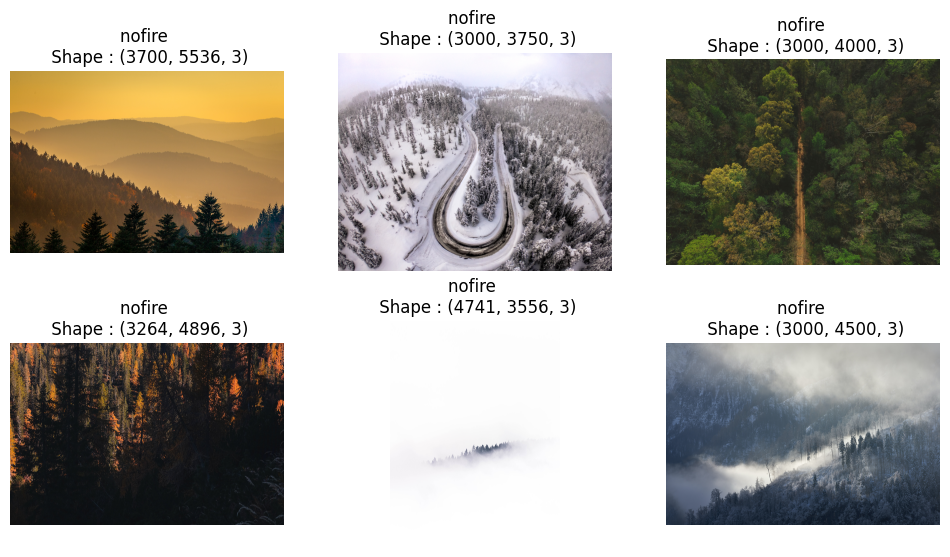

In [6]:
# Lets visualize the image in the dataset
plt.figure(figsize=(12,10))
for i in range(6):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n Shape : {img.shape}')
  plt.axis('off')
plt.show()

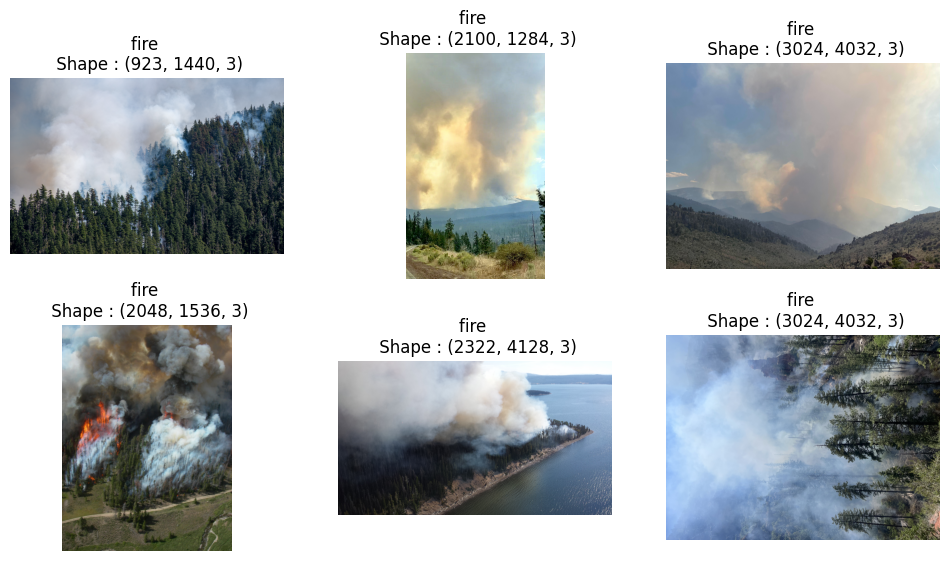

In [7]:
# Lets visualize the image in the dataset
plt.figure(figsize=(12,10))
for i in range(6):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n Shape : {img.shape}')
  plt.axis('off')
plt.show()

In [10]:
# Preprocessing
# Img dimensions and batch size

img_width, img_height = 150,150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator( rescale= 1./255)
val_datagen = ImageDataGenerator( rescale= 1./255)
test_datagen = ImageDataGenerator( rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = ( img_width , img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = ( img_width , img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = ( img_width , img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [11]:
# Mapping the indices
class_mapping = train_generator.class_indices
print(class_mapping)


{'fire': 0, 'nofire': 1}


In [13]:
# Building CNN model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512 , activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])